In [1]:
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
loaded = np.load("Data/subject_9.npz")
data = loaded['data']
#get a specific silhouette
silh = data[0,0,:,:]
print(data.shape)


(9, 1200, 424, 512)


In [3]:
import numpy as np
loaded = np.load('Data/DIRO_skeletons.npz')

#get skeleton data of size (n_subject, n_gait, n_frame, 25*3)
data = loaded['data']

#get joint coordinates of a specific skeleton
skel = data[0,0,0,:]
x = [skel[i] for i in range(0, len(skel), 3)]
y = [skel[i] for i in range(1, len(skel), 3)]
z = [skel[i] for i in range(2, len(skel), 3)]

#get default separation
separation = loaded['split']

#print information
print(data.shape)
print(separation)

(9, 9, 1200, 75)
['train' 'test' 'train' 'test' 'train' 'train' 'test' 'test' 'train']


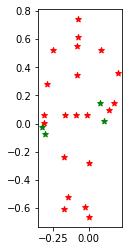

In [4]:
# Understand which index points to which joint

i = 0
j = 21
k = len(x)

fig, ax = plt.subplots()
ax.scatter(x[i:j], y[i:j], label= "stars", color= "red", marker= "*")
ax.scatter(x[j:k], y[j:k], label= "stars", color= "green", marker= "*")

ax.set_aspect(1)
plt.show()

In [5]:
pairs = [
    (2,3),  (0,1), (3,20), (1,20),
    (4,5),  (5,6), (6,7), 
    (8,9),  (9,10),(10,11),
    (4,20), (8,20), 
    (12,16),
    (12,13),(13,14), (14,15),
    (16,17),(17,18), (18,19),
    ]

def plot_skeleton(fig, ax, x,y,z, is3D=False):
    ax.clear()
    if is3D:
        for (i,j) in pairs:
            ax.plot3D([x[i],x[j]],[z[i],z[j]],[y[i],y[j]],  'bo', linestyle="-")
#             print([z[i],z[j]],[y[i],y[j]],[x[i],x[j]])
#         ax.scatter3D(x, y, z, label= "stars", color= "red", marker= "*")

    else:
        plt.axis('off')
        for (i,j) in pairs:
            plt.plot([x[i],x[j]], [y[i],y[j]],'go', linestyle="-")

    plt.show()

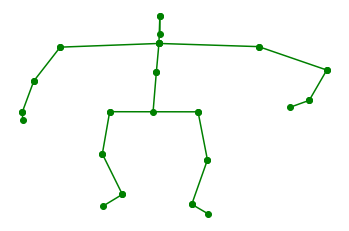

In [6]:
fig, ax = plt.subplots()
plot_skeleton(fig, ax, x,y,z)

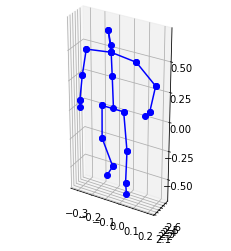

25


In [7]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_box_aspect(aspect = (1,0.3,2))
plot_skeleton(fig, ax, x,y,z, True)
# ax.scatter3D(z, y, x);

print(len(x))

In [8]:
## walk animation


%matplotlib notebook
from IPython.display import HTML
# HTML(ani.to_jshtml())
# %matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


def animate(i, is3D):
    skel = data[0,0,i,:]
    x = [skel[i] for i in range(0, len(skel), 3)]
    y = [skel[i] for i in range(1, len(skel), 3)]
    z = [skel[i] for i in range(2, len(skel), 3)]

    plot_skeleton(fig, ax, x,y,z, is3D)
    

def animate_2D(i):
    animate(i, False)
    
def animate_3D(i):
    animate(i, True)

<IPython.core.display.Javascript object>


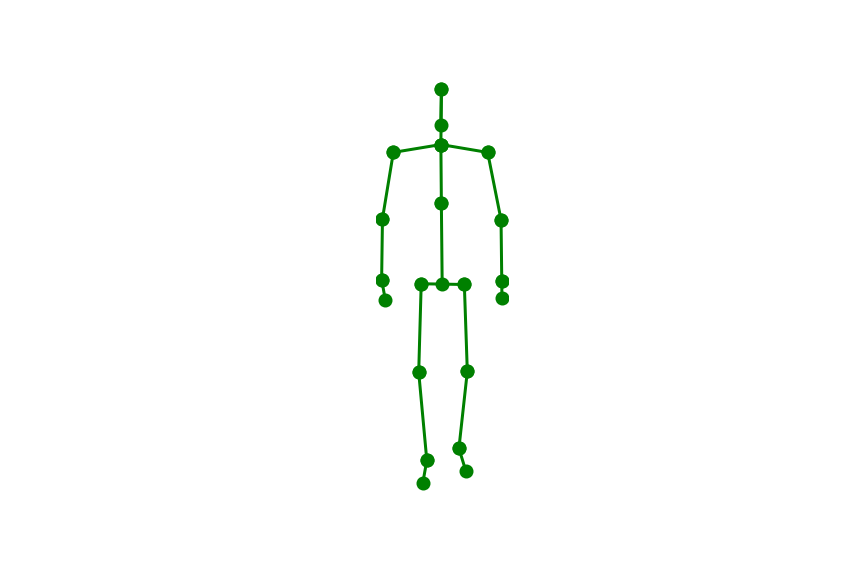

MovieWriter imagemagick unavailable; using Pillow instead.


In [17]:
## 2D walk animation

fig, ax = plt.subplots()
ax.set_aspect(1)
anim_2D = animation.FuncAnimation(fig, animate_2D, interval=2) 
plt.show()
anim_2D.save('2D_walk.gif', writer = 'imagemagick')

In [10]:
print(len(x))
print(x)


25
[-0.0906137, -0.0850455, -0.0789844, -0.0790488, -0.249739, -0.29492, -0.314403, -0.314071, 0.0902791, 0.206854, 0.176798, 0.143633, -0.16492, -0.177554, -0.143253, -0.175571, -0.0136208, 0.00246826, -0.0243822, 0.00378477, -0.0805817, -0.309354, -0.329608, 0.109831, 0.0819671]


<IPython.core.display.Javascript object>


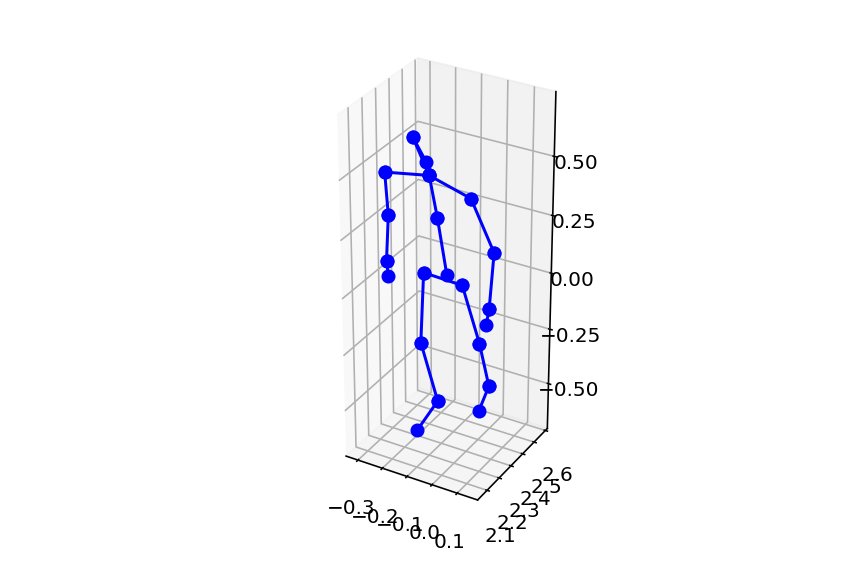

MovieWriter imagemagick unavailable; using Pillow instead.


In [15]:
## 3D walk animation

fig = plt.figure()
ax = plt.axes(projection='3d')
# ax.set_box_aspect(aspect = (1,0.1,2))
ax.set_box_aspect((np.ptp(z), np.ptp(x), np.ptp(y)))  # aspect ratio is 1:1:1 in data space
anim_3D = animation.FuncAnimation(fig, animate_3D, interval=5) 
plt.show()
anim_3D.save('3D_walk.gif', writer = 'imagemagick')